# Long Short-Term Memory (LSTM) para Análisis de Series de Tiempo

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
tf.random.set_seed(21562)

# Preparación de datos

Cargamos los datos

In [29]:
df = pd.read_csv('data/precios.csv', parse_dates=['Fecha'], index_col='Fecha')

In [30]:
df.head()

,Super,Regular,Diesel
Fecha,,,
2002-01-01,12.55,12.19,8.95
2002-02-01,12.29,11.90,8.66
2002-03-01,12.58,12.17,8.69
2002-04-01,14.11,13.71,9.38
2002-05-01,14.16,13.79,9.44


Visualización de los datos

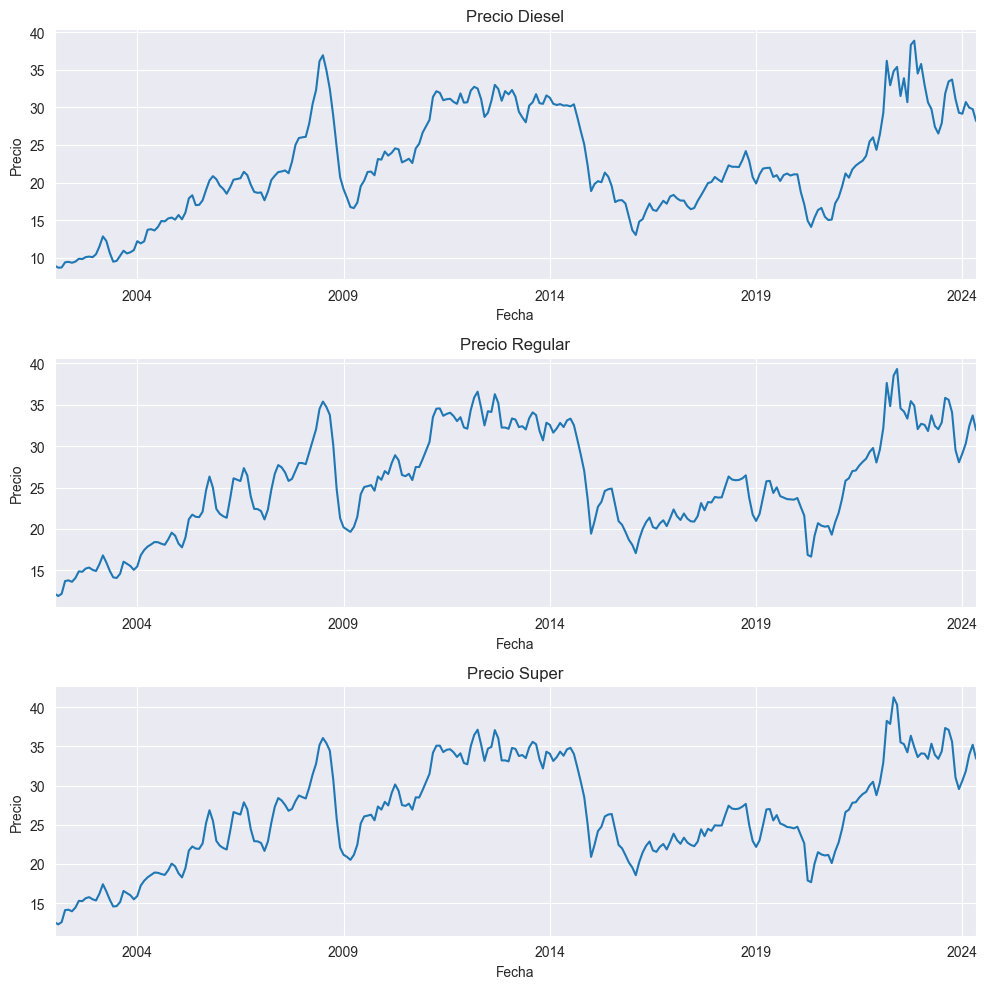

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

df['Diesel'].plot(
    ax=ax[0],
    title='Precio Diesel',
    xlabel='Fecha',
    ylabel='Precio'
)

df['Regular'].plot(
    ax=ax[1],
    title='Precio Regular',
    xlabel='Fecha',
    ylabel='Precio'
)

df['Super'].plot(
    ax=ax[2],
    title='Precio Super',
    xlabel='Fecha',
    ylabel='Precio'
)

plt.tight_layout()

plt.show()

Descompocisión de la serie de tiempo

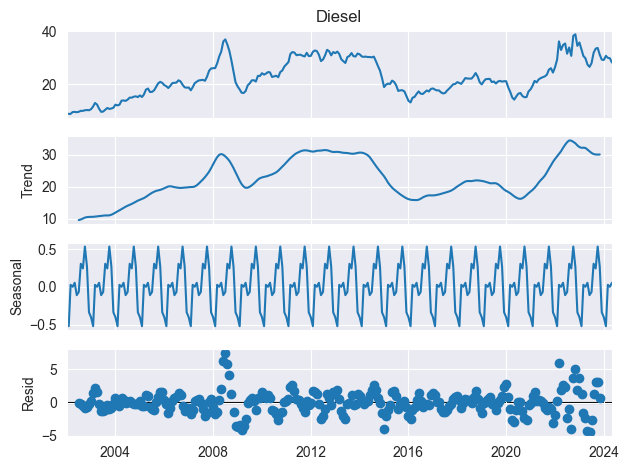

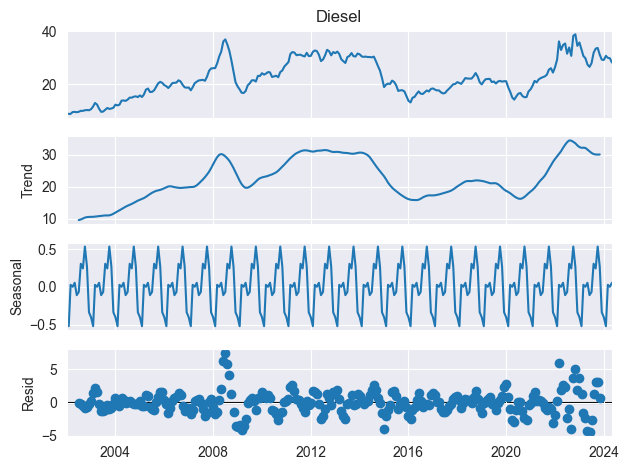

In [32]:
seasonal_decompose(df['Diesel'], model='additive', period=12).plot()

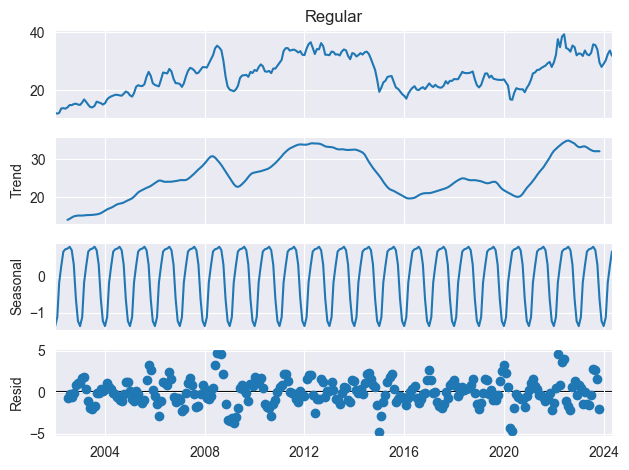

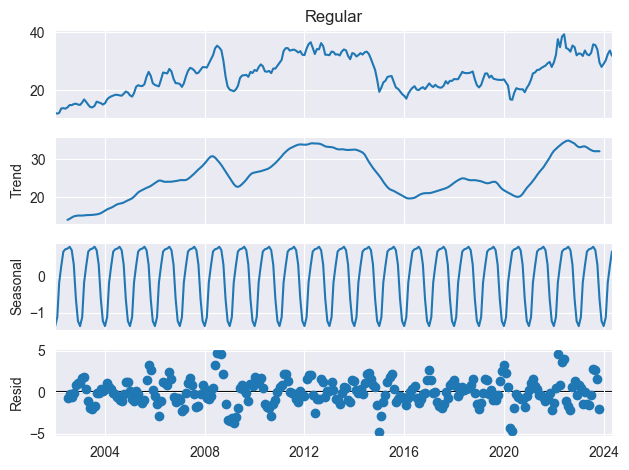

In [33]:
seasonal_decompose(df['Regular'], model='additive', period=12).plot()

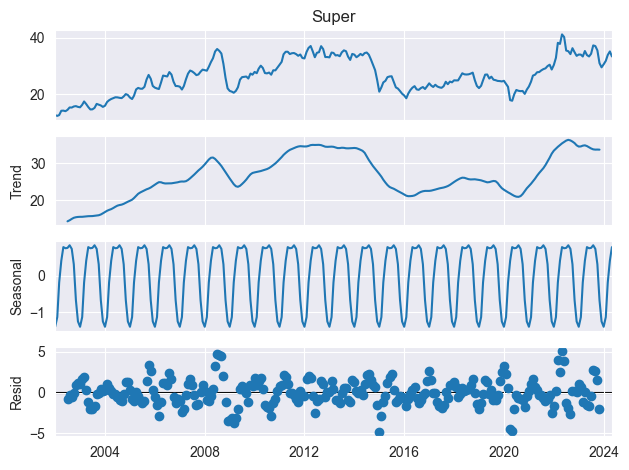

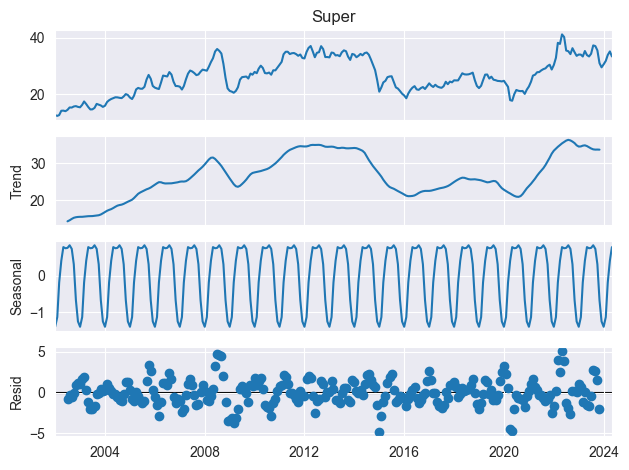

In [34]:
seasonal_decompose(df['Super'], model='additive', period=12).plot()

Diferenciación de la serie de tiempo

In [35]:
df['Diesel_diff'] = df['Diesel'].diff()

In [36]:
df['Regular_diff'] = df['Regular'].diff()

In [37]:
df['Super_diff'] = df['Super'].diff()

Eliminamos los valores nulos

In [38]:
df.dropna(inplace=True)

In [39]:
df.head()

,Super,Regular,Diesel,Diesel_diff,Regular_diff,Super_diff
Fecha,,,,,,
2002-02-01,12.29,11.90,8.66,-0.29,-0.29,-0.26
2002-03-01,12.58,12.17,8.69,0.03,0.27,0.29
2002-04-01,14.11,13.71,9.38,0.69,1.54,1.53
2002-05-01,14.16,13.79,9.44,0.06,0.08,0.05
2002-06-01,13.96,13.62,9.32,-0.12,-0.17,-0.20


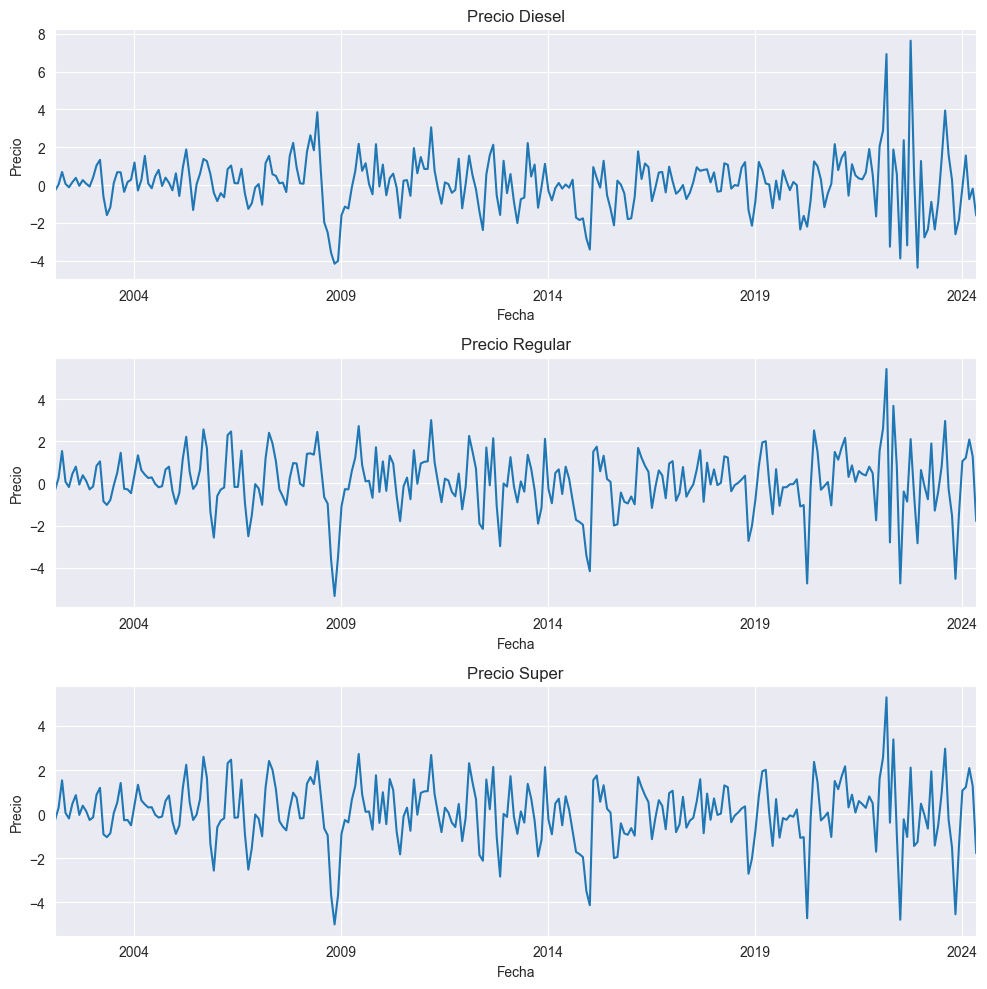

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

df['Diesel_diff'].plot(
    ax=ax[0],
    title='Precio Diesel',
    xlabel='Fecha',
    ylabel='Precio'
)

df['Regular_diff'].plot(
    ax=ax[1],
    title='Precio Regular',
    xlabel='Fecha',
    ylabel='Precio'
)

df['Super_diff'].plot(
    ax=ax[2],
    title='Precio Super',
    xlabel='Fecha',
    ylabel='Precio'
)

plt.tight_layout()

Normalización de los datos

In [41]:
scaler = MinMaxScaler(
    feature_range=(0, 1)
)

In [42]:
diesel_data = df['Diesel_diff'].values.reshape(-1, 1)
diesel_data = scaler.fit_transform(diesel_data)

In [43]:
regular_data = df['Regular_diff'].values.reshape(-1, 1)
regular_data = scaler.fit_transform(regular_data)

In [44]:
super_data = df['Super_diff'].values.reshape(-1, 1)
super_data = scaler.fit_transform(super_data)

Creación de secuencias

In [45]:
def create_sequences(data, seq_length=1, train_size=0.6, val_size=0.2, test_size=0.2):
    """
    Crea secuencias de datos "supervisados". Se crea una matriz bidimensional donde la dimennsión 0 es t-1 y la dimensión 1 es t.
    :param data: 
    :param seq_length: 
    :return: 
    """
    train_idx = int(len(data) * train_size)
    val_idx = int(len(data) * (train_size + val_size))

    train_data = data[:train_idx]
    val_data = data[train_idx:val_idx]
    test_data = data[val_idx:]

    X_train, y_train = [], []
    X_val, y_val = [], []
    X_test, y_test = [], []

    for i in range(seq_length, len(train_data)):
        X_train.append(train_data[i - seq_length:i, 0])
        y_train.append(train_data[i, 0])

    for i in range(seq_length, len(val_data)):
        X_val.append(val_data[i - seq_length:i, 0])
        y_val.append(val_data[i, 0])

    for i in range(seq_length, len(test_data)):
        X_test.append(test_data[i - seq_length:i, 0])
        y_test.append(test_data[i, 0])
        
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_val, y_val = np.array(X_val), np.array(y_val)
    X_test, y_test = np.array(X_test), np.array(y_test)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_val, y_val, X_test, y_test

In [48]:
diesel_split = create_sequences(diesel_data)

X_train_diesel = diesel_split[0]
y_train_diesel = diesel_split[1]
X_val_diesel = diesel_split[2]
y_val_diesel = diesel_split[3]
X_test_diesel = diesel_split[4]
y_test_diesel = diesel_split[5]

In [49]:
regular_split = create_sequences(regular_data)

X_train_regular = regular_split[0]
y_train_regular = regular_split[1]
X_val_regular = regular_split[2]
y_val_regular = regular_split[3]
X_test_regular = regular_split[4]
y_test_regular = regular_split[5]

In [50]:
super_split = create_sequences(super_data)

X_train_super = super_split[0]
y_train_super = super_split[1]
X_val_super = super_split[2]
y_val_super = super_split[3]
X_test_super = super_split[4]
y_test_super = super_split[5]